# Linguistic Features

In [1]:
import stanza

stanza.download('en') # download English model

nlp = stanza.Pipeline(
    "en",
    processors="tokenize,pos,lemma,depparse",
    use_gpu=False
)

2025-12-05 19:56:36 INFO: Downloaded file to C:\Users\erina\stanza_resources\resources.json
2025-12-05 19:56:36 INFO: Downloading default packages for language: en (English) ...
2025-12-05 19:56:38 INFO: File exists: C:\Users\erina\stanza_resources\en\default.zip
2025-12-05 19:56:42 INFO: Finished downloading models and saved to C:\Users\erina\stanza_resources
2025-12-05 19:56:42 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-05 19:56:42 INFO: Downloaded file to C:\Users\erina\stanza_resources\resources.json
2025-12-05 19:56:42 WARNING: Language en package default expects mwt, which has been added
2025-12-05 19:56:43 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2025-12-05 19:56:43 INFO: Using device: cpu
2025-12-05 19:56:43 INFO: Loading: tokenize
2025-12-05 19:56:45 INFO: Loading: mwt
2025-12-05 19:56:45 INFO: Loading: pos
2025-12-05 19:56:47 INFO: Loading: lemma
2025-12-05 19:56:47 INFO: Loading: depparse
2025-12-05 19:56:48 INFO: Done loading processors!


In [2]:
import pandas as pd
# import dataframe
df = pd.read_csv("data/sentiment_scores/output_sentiment_clean.csv")

In [3]:
df.head()

politician                 type_of_speech  \
0  king_angus_s_jr        partisan_rally_speeches   
1  king_angus_s_jr        partisan_rally_speeches   
2  king_angus_s_jr        partisan_rally_speeches   
3  king_angus_s_jr  bipartisan_and_other_speeches   
4  king_angus_s_jr  bipartisan_and_other_speeches   

                                           file_name  \
0  "now_is_the_time_to_establish_a_redline_—_the_...   
1  Gov._angus_king_speaking_at_a_rally_in_portlan...   
2     Founding_fathers_cold_open_-_snl_processed.txt   
3  bipartisan_unknown_senators_king_collins_celeb...   
4  bipartisan_unknown_king_questions_experts_on_i...   

                                                text   sadness       joy  \
0  the senate for maine is recognized. we all beg...  0.124538  0.320375   
1  angus king. the dogmas of the quiet past are i...  0.013997  0.270341   
2  nearly 250 years ago, delegates from the 13 am...  0.006786  0.759802   
3  skip to content click here to sign up for the ...  0.023634  0.767484   
4  skip to content click here to sign up for the ...  0.023634  0.767484   

       love     anger      fear  surprise  ...  topic_0_score  topic_1_score  \
0  0.001485  0.482588  0.069628  0.001386  ...       0.042844       0.036995   
1  0.002355  0.592581  0.118445  0.002281  ...       0.057972       0.016637   
2  0.002123  0.222126  0.006815  0.002348  ...       0.147585       0.000000   
3  0.019325  0.167670  0.019325  0.002562  ...       0.000000       0.000000   
4  0.019325  0.167670  0.019325  0.002562  ...       0.000000       0.000000   

   topic_2_score  topic_3_score  topic_4_score  topic_5_score  topic_6_score  \
0       0.017078       0.013314       0.000972       0.004572       0.083707   
1       0.014935       0.000000       0.000000       0.006834       0.036449   
2       0.000000       0.000000       0.000000       0.000000       0.007381   
3       0.000000       0.000000       0.381938       0.000000       0.000000   
4       0.000000       0.000000       0.381938       0.000000       0.000000   

   cluster     tsne_x     tsne_y  
0        1 -23.976166 -13.263207  
1        1 -41.195934 -72.913580  
2        1 -20.954987 -13.536193  
3        2  10.837202 -74.833350  
4        2   9.190097 -74.246340  

[5 rows x 21 columns]

# Running Stanza on 3 Politicans

High Variation #1: gillibrand_kirsten_e
High Variation #2: correa_j
Low Variation: bera_ami

In [4]:
df_gill = df[df['politician'] == "gillibrand_kirsten_e"].copy()
df_corr = df[df['politician'] == "correa_j"].copy()
df_bera = df[df['politician'] == "bera_ami"].copy()

In [5]:
df_gill.head()

politician           type_of_speech  \
557  gillibrand_kirsten_e  partisan_rally_speeches   
558  gillibrand_kirsten_e  partisan_rally_speeches   
559  gillibrand_kirsten_e     house_floor_speeches   
560  gillibrand_kirsten_e     house_floor_speeches   
561  gillibrand_kirsten_e     house_floor_speeches   

                                             file_name  \
557  New_york_sen._kirsten_gillibrand_joins_2020_pr...   
558  Kirsten_gillibrand_-_full_power_of_women_speec...   
559  floor_2024_02_07_CREC_2024_02_07_pt1_PgH509_pr...   
560  floor_2024_02_28_CREC_2024_02_28_pt1_PgH722_pr...   
561  floor_2024_03_06_CREC_2024_03_06_pt1_PgH831_pr...   

                                                  text   sadness       joy  \
557  senator kirsten gillibrand is jumping into the...  0.004423  0.629822   
558  six months and eight days ago, a story broke i...  0.458629  0.354935   
559  [congressional record volume 170, number 22 (w...  0.058231  0.292128   
560  [congressional record volume 170, number 36 (w...  0.015087  0.657641   
561  [congressional record volume 170, number 40 (w...  0.301817  0.363112   

         love     anger      fear  surprise  ...  topic_0_score  \
557  0.052964  0.270543  0.005292  0.036956  ...       0.142183   
558  0.004127  0.174485  0.006477  0.001347  ...       0.064705   
559  0.032413  0.576505  0.038495  0.002228  ...       0.008373   
560  0.004971  0.285217  0.033769  0.003315  ...       0.000000   
561  0.326200  0.005915  0.001941  0.001015  ...       0.023347   

     topic_1_score  topic_2_score  topic_3_score  topic_4_score  \
557       0.000000       0.002627       0.021237       0.005229   
558       0.019377       0.020066       0.008998       0.000000   
559       0.158902       0.000243       0.013835       0.026558   
560       0.165605       0.015576       0.000000       0.004920   
561       0.161005       0.000000       0.046866       0.000000   

     topic_5_score  topic_6_score  cluster     tsne_x     tsne_y  
557       0.000000       0.029386        1 -38.024555  11.211616  
558       0.045415       0.013078        2 -82.913080   2.368134  
559       0.186155       0.000000        3  27.361588  48.944542  
560       0.004488       0.000000        3  52.670757  25.747150  
561       0.000000       0.000000        2  27.170633 -28.604383  

[5 rows x 21 columns]

In [6]:
df_corr.head()

politician           type_of_speech  \
1803   correa_j  partisan_rally_speeches   
1804   correa_j  partisan_rally_speeches   
1805   correa_j  partisan_rally_speeches   
1806   correa_j  partisan_rally_speeches   
1807   correa_j  partisan_rally_speeches   

                                              file_name  \
1803  ‘they_used_us’__latino_voters_in_florida_react...   
1804  Lou_correa_asks_doj_official_at_what_point_a_c...   
1805  Blessing_the_next_generation_beyond_their_circ...   
1806  Houston_astros_shortstop_carlos_correa_on_worl...   
1807               The_group_s_rally_cars_processed.txt   

                                                   text   sadness       joy  \
1803  a wave of disappointment. one of president don...  0.527791  0.354140   
1804  i recognize myself for five minutes of questio...  0.011420  0.466925   
1805  mawapan si nyopol hindi po kasi pasar jeff, ma...  0.164507  0.536388   
1806  congratulations, first of all. thank you. is i...  0.052958  0.933862   
1807  a few months ago, as some of you likely know, ...  0.030945  0.803337   

          love     anger      fear  surprise  ...  topic_0_score  \
1803  0.002074  0.088208  0.026908  0.000880  ...       0.065347   
1804  0.003610  0.498243  0.017928  0.001874  ...       0.032467   
1805  0.027761  0.229811  0.040451  0.001081  ...       0.120428   
1806  0.003567  0.005188  0.003746  0.000679  ...       0.158664   
1807  0.002152  0.143005  0.018645  0.001917  ...       0.048493   

      topic_1_score  topic_2_score  topic_3_score  topic_4_score  \
1803       0.000000       0.000893            0.0       0.010526   
1804       0.038614       0.052717            0.0       0.040433   
1805       0.000000       0.000000            0.0       0.000000   
1806       0.000000       0.000000            0.0       0.000000   
1807       0.008740       0.014488            0.0       0.000000   

      topic_5_score  topic_6_score  cluster     tsne_x     tsne_y  
1803       0.026599        0.11439        4 -25.155493 -44.321750  
1804       0.000000        0.03654        4 -10.605682   4.920082  
1805       0.000000        0.00000        2 -80.165920  10.837220  
1806       0.000000        0.00000        1   9.042685 -26.497970  
1807       0.002707        0.00000        2  16.800093 -10.850982  

[5 rows x 21 columns]

In [7]:
df_bera.head()

politician           type_of_speech  \
2057   bera_ami  partisan_rally_speeches   
2058   bera_ami  partisan_rally_speeches   
2059   bera_ami  partisan_rally_speeches   
2060   bera_ami  partisan_rally_speeches   
2061   bera_ami  partisan_rally_speeches   

                                              file_name  \
2057  Congressman_ami_bera_at_chhankata_2014_on_augu...   
2058  A_conversation_with_congressman_ami_bera_proce...   
2059  Support_rally_featuring_bill_clinton__dr._ami_...   
2060  Dr._ami_bera_campaign_gotv_rally_nov._6,_2016_...   
2061  3.9.17._hfac_member_rep._ami_bera_remarks_on_r...   

                                                   text   sadness       joy  \
2057  congressman emmy vera is amongst us. we extend...  0.003677  0.905352   
2058  yes, great to have all of you here this aftern...  0.007667  0.897467   
2059  let us do this. this feels like coming home be...  0.035050  0.697450   
2060  yeah, it is great to be flanked by our local a...  0.015523  0.917010   
2061  this hearing, it is disturbing to me, you know...  0.565048  0.025713   

          love     anger      fear  surprise  ...  topic_0_score  \
2057  0.012298  0.070433  0.007287  0.000952  ...       0.041818   
2058  0.002586  0.066398  0.005037  0.020847  ...       0.121277   
2059  0.025213  0.236826  0.003902  0.001558  ...       0.074493   
2060  0.002470  0.062471  0.001200  0.001326  ...       0.135864   
2061  0.002153  0.396107  0.010382  0.000597  ...       0.061026   

      topic_1_score  topic_2_score  topic_3_score  topic_4_score  \
2057       0.015630       0.012648       0.000000       0.000000   
2058       0.009307       0.016124       0.000000       0.006224   
2059       0.004816       0.001193       0.000000       0.008015   
2060       0.000000       0.000092       0.007033       0.000000   
2061       0.013752       0.000000       0.004579       0.000000   

      topic_5_score  topic_6_score  cluster     tsne_x     tsne_y  
2057       0.000000       0.015023        2 -30.410494 -16.793869  
2058       0.000000       0.017051        2 -31.812910 -30.538492  
2059       0.080092       0.041656        1 -23.781902 -39.906338  
2060       0.000000       0.004332        1 -34.385654 -15.705953  
2061       0.000000       0.059279        4  27.667004  -9.974813  

[5 rows x 21 columns]

### Gently Clean

In [8]:
def clean_text(t):
    return t.replace('\n', ' ').strip()

df_corr['clean_text'] = df_corr['text'].apply(clean_text)
df_bera['clean_text'] = df_bera['text'].apply(clean_text)
df_gill['clean_text'] = df_gill['text'].apply(clean_text)

### Stanza Operations

In [ ]:
def stanza_by_sentence(text):
    if not isinstance(text, str) or not text.strip():
        return None

    doc = nlp(text)
    
    # list of stanza Sentence objects
    return doc.sentences

df_corr['stanza_doc'] = df_corr['clean_text'].apply(stanza_by_sentence)

In [ ]:
df_bera['stanza_doc'] = df_bera['clean_text'].apply(stanza_by_sentence)

In [ ]:
df_gill['stanza_doc'] = df_gill['clean_text'].apply(stanza_by_sentence)

In [ ]:
sentiment_cols = ["sadness", "joy", "love", "anger", "fear", "surprise"]

df_corr["avg_sentiment"] = df_corr[sentiment_cols].mean(axis=1)
df_bera["avg_sentiment"] = df_bera[sentiment_cols].mean(axis=1)
df_gill["avg_sentiment"] = df_gill[sentiment_cols].mean(axis=1)

In [ ]:
def sentence_lengths(doc):
    return [len(sent.words) for sent in doc.sentences]

df_corr['sentence_lengths'] = df_corr['stanza_doc'].apply(sentence_lengths)
df_corr['avg_sentence_length'] = df_corr['sentence_lengths'].apply(lambda x: sum(x) / len(x))

df_bera['sentence_lengths'] = df_bera['stanza_doc'].apply(sentence_lengths)
df_bera['avg_sentence_length'] = df_bera['sentence_lengths'].apply(lambda x: sum(x) / len(x))

df_gill['sentence_lengths'] = df_gill['stanza_doc'].apply(sentence_lengths)
df_gill['avg_sentence_length'] = df_gill['sentence_lengths'].apply(lambda x: sum(x) / len(x))

In [ ]:
from collections import Counter

def pos_counts(doc):
    tags = [w.xpos for sent in doc.sentences for w in sent.words]
    return Counter(tags)

df_corr['pos_counts'] = df_corr['stanza_doc'].apply(pos_counts)
df_gill['pos_counts'] = df_gill['stanza_doc'].apply(pos_counts)
df_bera['pos_counts'] = df_bera['stanza_doc'].apply(pos_counts)

In [ ]:
def normalize_counts(counts):
    total = sum(counts.values())
    return {k: v/total for k,v in counts.items()}

df_bera['pos_freq'] = df_bera['pos_counts'].apply(normalize_counts)
df_corr['pos_freq'] = df_corr['pos_counts'].apply(normalize_counts)
df_gill['pos_freq'] = df_gill['pos_counts'].apply(normalize_counts)

In [ ]:
def dep_labels(doc):
    return [w.deprel for sent in doc.sentences for w in sent.words]

df_gill['dep_labels'] = df_gill['stanza_doc'].apply(dep_labels)
df_corr['dep_labels'] = df_corr['stanza_doc'].apply(dep_labels)
df_bera['dep_labels'] = df_bera['stanza_doc'].apply(dep_labels)

### Extract Year from Filename

In [ ]:
import re

def extract_year(filename):
    if not isinstance(filename, str):
        return None
    
    # Extract ANY 4-digit numbers
    match = re.findall(r"(\d{4})", filename)
    
    # No match
    if not match:
        return None
    
    # Convert all matches to integers, keep only years after 2000
    years = [int(y) for y in match if 2000 <= int(y) <= 2099]
    
    return years[0] if years else None

df_bera["year"] = df_bera["file_name"].apply(extract_year)
df_corr["year"] = df_corr["file_name"].apply(extract_year)
df_gill["year"] = df_gill["file_name"].apply(extract_year)


In [ ]:
df_gill["date"] = pd.to_datetime(df_gill["year"], format="%Y")
df_corr["date"] = pd.to_datetime(df_corr["year"], format="%Y")
df_bera["date"] = pd.to_datetime(df_bera["year"], format="%Y")

In [ ]:
df_bera['pronoun_rate'] = df_bera['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_bera['modal_rate']   = df_bera['pos_counts'].apply(lambda c: c.get('MD', 0))
df_bera['adj_rate']     = df_bera['pos_counts'].apply(lambda c: c.get('JJ', 0))

df_corr['pronoun_rate'] = df_corr['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_corr['modal_rate']   = df_corr['pos_counts'].apply(lambda c: c.get('MD', 0))
df_corr['adj_rate']     = df_corr['pos_counts'].apply(lambda c: c.get('JJ', 0))


df_gill['pronoun_rate'] = df_gill['pos_counts'].apply(lambda c: c.get('PRP', 0))
df_gill['modal_rate']   = df_gill['pos_counts'].apply(lambda c: c.get('MD', 0))
df_gill['adj_rate']     = df_gill['pos_counts'].apply(lambda c: c.get('JJ', 0))

In [ ]:
df_gill['nsubj_count'] = df_gill['dep_labels'].apply(lambda x: x.count('nsubj'))
df_gill['advmod_count'] = df_gill['dep_labels'].apply(lambda x: x.count('advmod'))
df_gill['aux_count'] = df_gill['dep_labels'].apply(lambda x: x.count('aux'))

df_corr['nsubj_count'] = df_corr['dep_labels'].apply(lambda x: x.count('nsubj'))
df_corr['advmod_count'] = df_corr['dep_labels'].apply(lambda x: x.count('advmod'))
df_corr['aux_count'] = df_corr['dep_labels'].apply(lambda x: x.count('aux'))

df_bera['nsubj_count'] = df_bera['dep_labels'].apply(lambda x: x.count('nsubj'))
df_bera['advmod_count'] = df_bera['dep_labels'].apply(lambda x: x.count('advmod'))
df_bera['aux_count'] = df_bera['dep_labels'].apply(lambda x: x.count('aux'))

### Visualizations

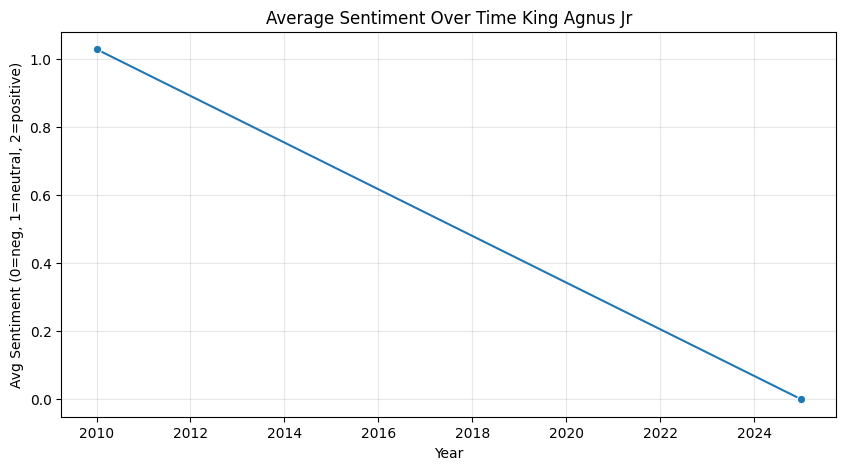

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df_gill.sort_values("year"), x="year", y="avg_sentiment", marker="o")
plt.title("Average Sentiment Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Avg Sentiment (0=neg, 1=neutral, 2=positive)")
plt.grid(True, alpha=0.3)
plt.show()

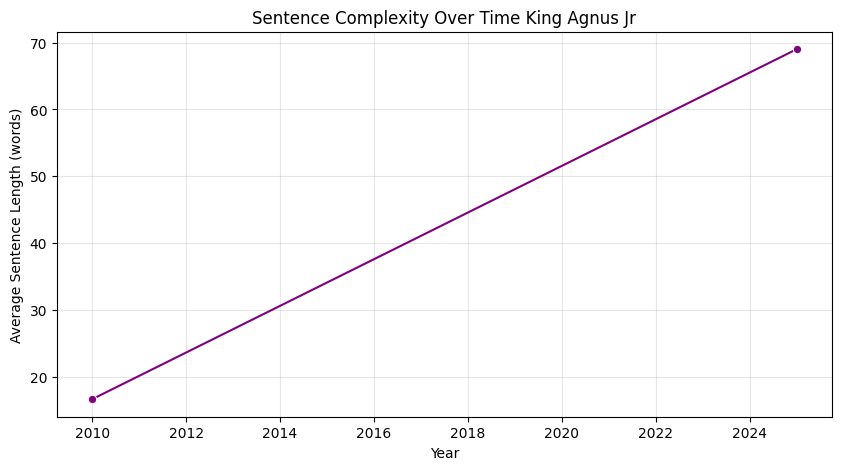

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_gill.sort_values("year"), x="year", y="avg_sentence_length", marker="o", color="purple")
plt.title("Sentence Complexity Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Average Sentence Length (words)")
plt.grid(True, alpha=0.3)
plt.show()

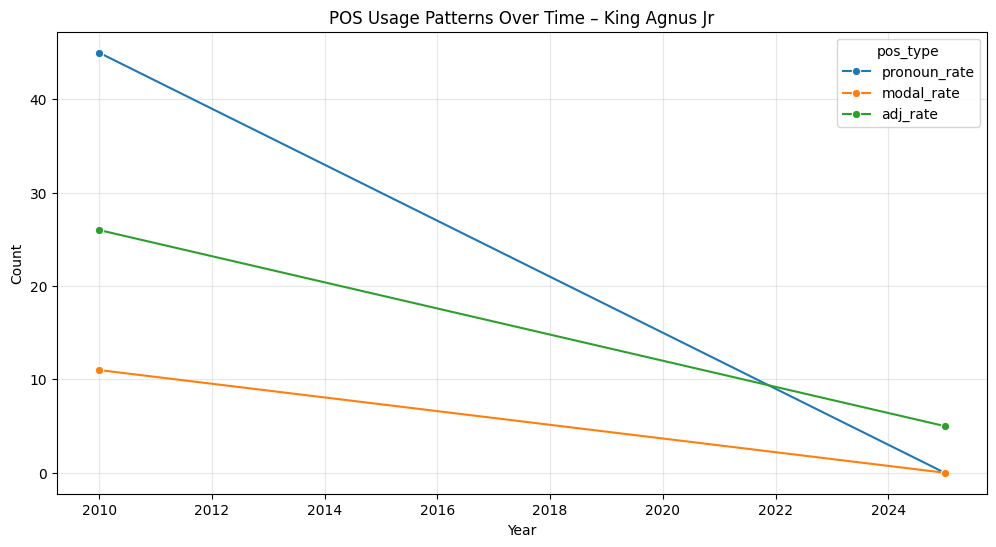

In [ ]:
plt.figure(figsize=(12,6))
melt_df = df_gill.melt(
    id_vars=["year"],
    value_vars=["pronoun_rate", "modal_rate", "adj_rate"],
    var_name="pos_type",
    value_name="count"
)

sns.lineplot(data=melt_df.sort_values("year"), x="year", y="count", hue="pos_type", marker="o")
plt.title("POS Usage Patterns Over Time - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

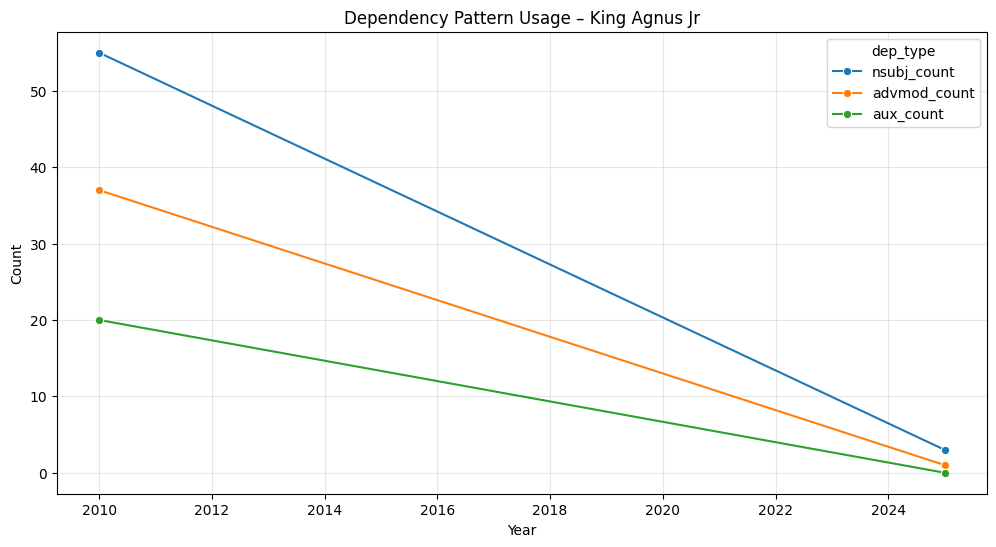

In [ ]:
plt.figure(figsize=(12,6))
deps_df = df_gill.melt(
    id_vars=["year"],
    value_vars=["nsubj_count", "advmod_count", "aux_count"],
    var_name="dep_type",
    value_name="count"
)

sns.lineplot(data=deps_df.sort_values("year"), x="year", y="count", hue="dep_type", marker="o")
plt.title("Dependency Pattern Usage - Gillibrand")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()

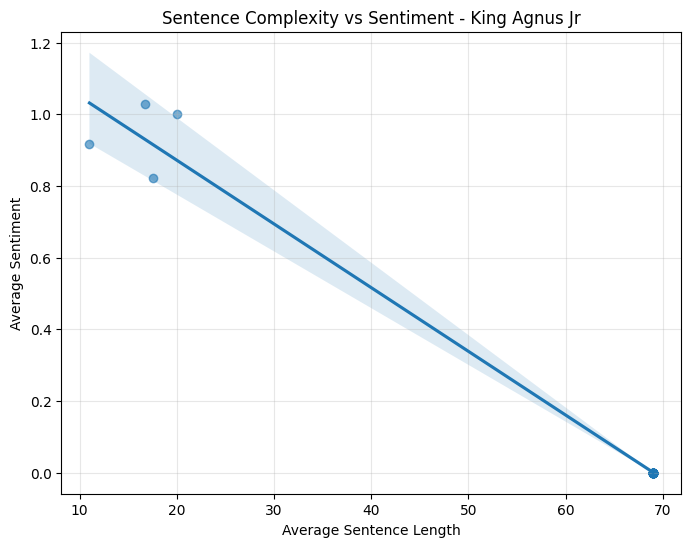

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_gill,
    x="avg_sentence_length",
    y="avg_sentiment",
    scatter_kws={"alpha":0.6}
)
plt.title("Sentence Complexity vs Sentiment - Gillibrand")
plt.xlabel("Average Sentence Length")
plt.ylabel("Average Sentiment")
plt.grid(True, alpha=0.3)
plt.show()

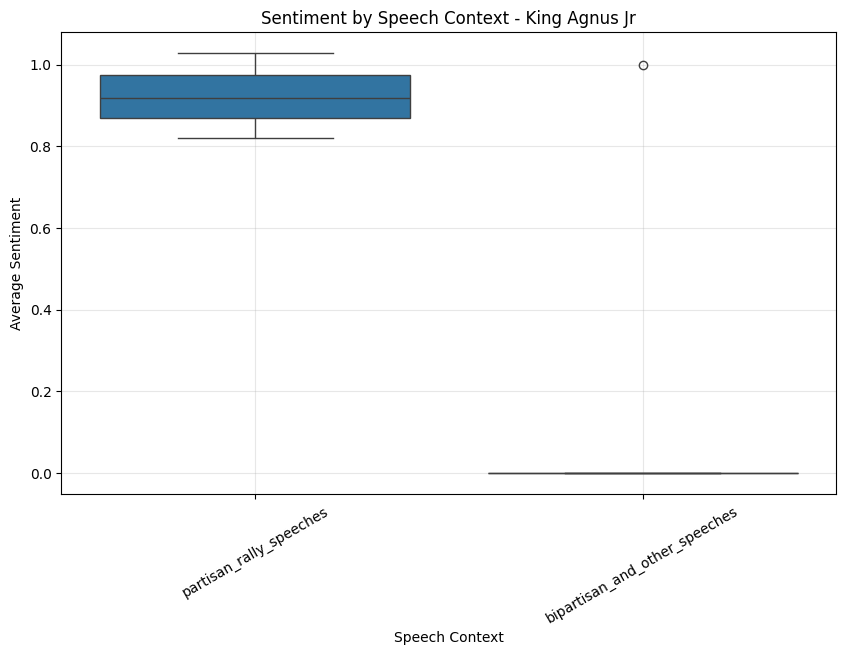

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_gill, x="type_of_speech", y="avg_sentiment")
plt.title("Sentiment by Speech Context - Gillibrand")
plt.xlabel("Speech Context")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)
plt.show()

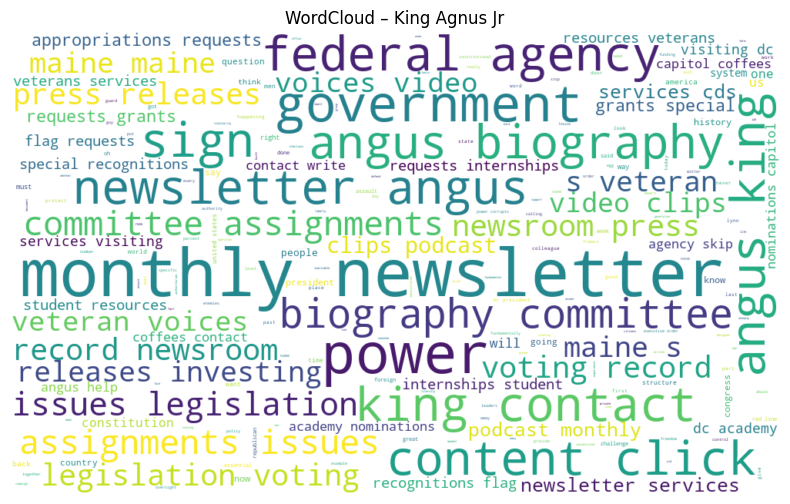

In [ ]:
from wordcloud import WordCloud

all_text = " ".join(df_gill["clean_text"].tolist())
wc = WordCloud(width=1000, height=600, background_color="white").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Gillibrand")
plt.show()

C:\Users\erina\AppData\Local\Temp\ipykernel_31348\2964819484.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verb_df, y="verb", x="count", palette="magma")


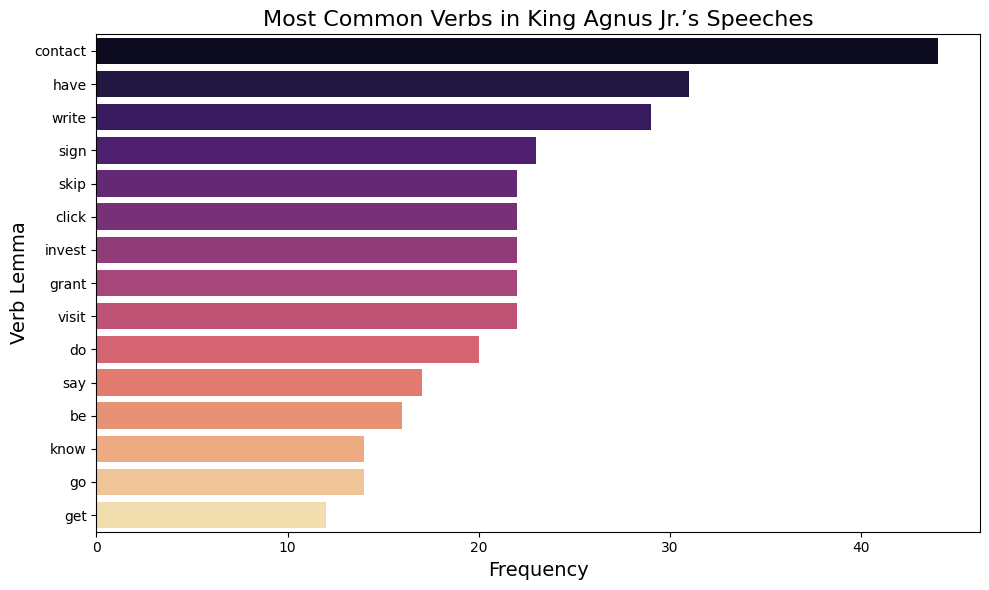

In [ ]:
from collections import Counter

verb_lemmas = []

for doc in df_gill["stanza_doc"].dropna():
    for sentence in doc.sentences:
        for tok in sentence.tokens:
            word = tok.words[0]  # each token may have subwords
            if word.upos == "VERB":
                verb_lemmas.append(word.lemma)

# Top 15 verbs
top_verbs = Counter(verb_lemmas).most_common(15)
verb_df = pd.DataFrame(top_verbs, columns=["verb", "count"])

plt.figure(figsize=(10,6))
sns.barplot(data=verb_df, y="verb", x="count", palette="magma")
plt.title("Most Common Verbs in Gillibrand's Speeches", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Verb Lemma", fontsize=14)
plt.tight_layout()
plt.show()

### Sample Use Cases

In [ ]:
doc = nlp("Barack Obama was born in Hawaii.") # run annotation over a sentence

In [ ]:
print(doc)
print(doc.entities)

[
  [
    {
      "id": 1,
      "text": "Barack",
      "lemma": "Barack",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 4,
      "deprel": "nsubj:pass",
      "start_char": 0,
      "end_char": 6,
      "ner": "B-PERSON",
      "multi_ner": [
        "B-PERSON"
      ]
    },
    {
      "id": 2,
      "text": "Obama",
      "lemma": "Obama",
      "upos": "PROPN",
      "xpos": "NNP",
      "feats": "Number=Sing",
      "head": 1,
      "deprel": "flat",
      "start_char": 7,
      "end_char": 12,
      "ner": "E-PERSON",
      "multi_ner": [
        "E-PERSON"
      ]
    },
    {
      "id": 3,
      "text": "was",
      "lemma": "be",
      "upos": "AUX",
      "xpos": "VBD",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin",
      "head": 4,
      "deprel": "aux:pass",
      "start_char": 13,
      "end_char": 16,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "b

In [ ]:
for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text, word.lemma, word.pos)

Barack Barack PROPN
Obama Obama PROPN
was be AUX
born bear VERB
in in ADP
Hawaii Hawaii PROPN
. . PUNCT


In [ ]:
for sentence in doc.sentences:
    print(sentence.ents)
    print(sentence.dependencies)

[{
  "text": "Barack Obama",
  "type": "PERSON",
  "start_char": 0,
  "end_char": 12
}, {
  "text": "Hawaii",
  "type": "GPE",
  "start_char": 25,
  "end_char": 31
}]
[({
  "id": 4,
  "text": "born",
  "lemma": "bear",
  "upos": "VERB",
  "xpos": "VBN",
  "feats": "Tense=Past|VerbForm=Part|Voice=Pass",
  "head": 0,
  "deprel": "root",
  "start_char": 17,
  "end_char": 21
}, 'nsubj:pass', {
  "id": 1,
  "text": "Barack",
  "lemma": "Barack",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 4,
  "deprel": "nsubj:pass",
  "start_char": 0,
  "end_char": 6
}), ({
  "id": 1,
  "text": "Barack",
  "lemma": "Barack",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 4,
  "deprel": "nsubj:pass",
  "start_char": 0,
  "end_char": 6
}, 'flat', {
  "id": 2,
  "text": "Obama",
  "lemma": "Obama",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 1,
  "deprel": "flat",
  "start_char": 7,
  "end_char": 12
}), ({
  "id": 4,
  "text": "b

## Multiple Documents

In [ ]:
documents = ["This is a test document.", "I wrote another document for fun."] # Documents that we are going to process
in_docs = [stanza.Document([], text=d) for d in documents] # Wrap each document with a stanza.Document object
out_docs = nlp(in_docs) # Call the neural pipeline on this list of documents
print(out_docs[1]) # The output is also a list of stanza.Document objects, each output corresponding to an input Document object

[
  [
    {
      "id": 1,
      "text": "I",
      "lemma": "I",
      "upos": "PRON",
      "xpos": "PRP",
      "feats": "Case=Nom|Number=Sing|Person=1|PronType=Prs",
      "head": 2,
      "deprel": "nsubj",
      "start_char": 0,
      "end_char": 1,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 2,
      "text": "wrote",
      "lemma": "write",
      "upos": "VERB",
      "xpos": "VBD",
      "feats": "Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "start_char": 2,
      "end_char": 7,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "another",
      "lemma": "another",
      "upos": "DET",
      "xpos": "DT",
      "feats": "PronType=Ind",
      "head": 4,
      "deprel": "det",
      "start_char": 8,
      "end_char": 15,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "document",
  

### Visualizations

In [ ]:
from IPython.display import HTML, display
import IPython
print(IPython.__version__)

9.7.0


In [ ]:
from stanza.utils.visualization.ner_visualization import visualize_strings

en_strings = ['''Samuel Jackson, a Christian man from Utah, went to the JFK Airport for a flight to New York.
                 He was thinking of attending the US Open, his favorite tennis tournament besides Wimbledon.
                 That would be a dream trip, certainly not possible since it is $5000 attendance and 5000 miles away.
                 On the way there, he watched the Super Bowl for 2 hours and read War and Piece by Tolstoy for 1 hour.
                 In New York, he crossed the Brooklyn Bridge and listened to the 5th symphony of Beethoven as well as
                 "All I want for Christmas is You" by Mariah Carey.''', 
              "Barack Obama was born in Hawaii. He was elected President of the United States in 2008"]
    
visualize_strings(en_strings, "en")

2025-11-25 10:02:41 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-11-25 10:02:41 INFO: Downloaded file to C:\Users\erina\stanza_resources\resources.json
2025-11-25 10:02:41 WARNING: Language en package default expects mwt, which has been added
2025-11-25 10:02:42 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

2025-11-25 10:02:42 INFO: Using device: cpu
2025-11-25 10:02:42 INFO: Loading: tokenize
2025-11-25 10:02:51 INFO: Loading: mwt
2025-11-25 10:02:51 INFO: Loading: ner
2025-11-25 10:02:54 INFO: Done loading processors!


In [ ]:
from stanza.utils.visualization.dependency_visualization import visualize_strings

en_file = "data/processed/desantis_ron/bipartisan_and_other_speeches/nbc_interview_2023_processed.txt"

with open(en_file, "r", encoding="utf-8") as file:
    data = file.read()

# Stanza needs a list of strings:
visualize_strings([data], "en")

2025-11-25 10:18:47 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-11-25 10:18:47 INFO: Downloaded file to C:\Users\erina\stanza_resources\resources.json
2025-11-25 10:18:47 WARNING: Language en package default expects mwt, which has been added
2025-11-25 10:18:48 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

2025-11-25 10:18:48 INFO: Using device: cpu
2025-11-25 10:18:48 INFO: Loading: tokenize
2025-11-25 10:18:48 INFO: Loading: mwt
2025-11-25 10:18:48 INFO: Loading: pos
2025-11-25 10:18:51 INFO: Loading: lemma
2025-11-25 10:18:51 INFO: Loading: depparse
2025-11-25 10:18:52 INFO: Done loading processors!
